# Car Price Prediction

### Step 1 : Importing all the required libraries

In [45]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, StandardScaler, LabelEncoder
from sklearn.metrics import fbeta_score,accuracy_score, make_scorer,roc_curve, roc_auc_score ,r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import OrderedDict
from datetime import datetime, date
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pprint
# magic word for producing visualizations in notebook
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('car details v4.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


### Step 2 : Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [4]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

From the details above it is visible that there are a few missing cells. 

In [6]:
df.nunique()

Make                    33
Model                 1050
Price                  619
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
dtype: int64

In [7]:
# Formatting Engine column to more readable format 
df['Engine'].astype(str)
df[['Engine_Power','Last']] = df.Engine.str.split(expand=True) 

In [8]:
df.drop(['Engine','Last'],axis= 1, inplace=True )
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine_Power
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,1198
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,1248
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1197
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,1197
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,2393


In [9]:
df.rename(columns = {'Engine_Power':'Engine'}, inplace = True)

In [10]:
#d.set_option('display.max_columns', 100)


In [11]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,1198
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,1248
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1197
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,1197
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,2393


In [12]:
# Filling Max Power and Max Torque details with value 0
df["Max Power"].fillna('0', inplace = True)
df["Max Torque"].fillna('0', inplace = True)

In [13]:
# Formatting the column to get correct values
for i, v in df.iterrows(): 
    if len(v['Max Power'].split()) == 1 and v['Max Power'] != '0' :
        m = v['Max Power'].replace('@' , " bhp @ ")
        df._set_value(i,'Max Power',m)
    if len(v['Max Torque'].split()) == 1 and v['Max Torque'] != '0' :
        m = v['Max Torque'].replace('@' , " bhp @ ")
        df._set_value(i,'Max Torque',m) 
    if v['Owner'] != 'First' and v['Owner'] != 'Second' and v['Owner'] != 'Third':
        df._set_value(i,'Owner','Rest')
#df.head (50)

In [14]:
df[['Max_Power','bhp','at','Power_Rpm', 'rpm' ]] = df['Max Power'].str.split(expand=True) 
df[['Max_Torque','bhp_t','att','Torque_Rpm', 'rpmt' ]] = df['Max Torque'].str.split(expand=True) 
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max_Power,bhp,at,Power_Rpm,rpm,Max_Torque,bhp_t,att,Torque_Rpm,rpmt
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87,bhp,@,6000,rpm,109,Nm,@,4500,rpm
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74,bhp,@,4000,rpm,190,Nm,@,2000,rpm
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79,bhp,@,6000,rpm,112.7619,Nm,@,4000,rpm
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82,bhp,@,6000,rpm,113,Nm,@,4200,rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148,bhp,@,3400,rpm,343,Nm,@,1400,rpm


In [15]:
df.drop(['bhp','at','rpm','Max Power','Max Torque', 'bhp_t','att','rpmt'],axis= 1, inplace=True )

In [16]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Engine                 80
Max_Power               0
Power_Rpm              85
Max_Torque              0
Torque_Rpm             81
dtype: int64

##### Formating columns to numeric values

In [17]:
df["Engine"].fillna(0, inplace = True)
df["Width"].fillna(0, inplace = True)
df["Length"].fillna(0, inplace = True)
df["Height"].fillna(0, inplace = True)
df["Fuel Tank Capacity"].fillna(0, inplace = True)
df["Engine"].fillna(0, inplace = True)
df["Power_Rpm"].fillna(0, inplace = True)
df["Torque_Rpm"].fillna(0, inplace = True)
df["Seating Capacity"].fillna(5, inplace = True)
df["Drivetrain"].fillna('FWD', inplace = True)

In [18]:
df['Engine'] = df['Engine'].astype(float)
df['Max_Power'] = df['Max_Power'].astype(float)
df['Power_Rpm'] = df['Power_Rpm'].astype(float)
df['Max_Torque'] = df['Max_Torque'].astype(float)
df['Torque_Rpm'] = df['Torque_Rpm'].astype(float)         

In [19]:
df["Engine"].replace(0,df["Engine"].mean(), inplace=True )
df["Width"].replace(0,df["Width"].mean(), inplace = True)
df["Length"].replace(0,df["Length"].mean(), inplace = True)
df["Length"].replace(0,df["Length"].mean(), inplace = True)
df["Fuel Tank Capacity"].replace(0, df["Fuel Tank Capacity"].mean(),inplace = True)
df["Engine"].replace(0,df["Engine"].mean(), inplace = True)
df["Power_Rpm"].replace(0,df["Power_Rpm"].mean(), inplace = True)
df["Torque_Rpm"].replace(0,df["Torque_Rpm"].mean(), inplace = True)

In [20]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Engine                0
Max_Power             0
Power_Rpm             0
Max_Torque            0
Torque_Rpm            0
dtype: int64

##### Let us try to visualize the data.

First we will create Pairplot

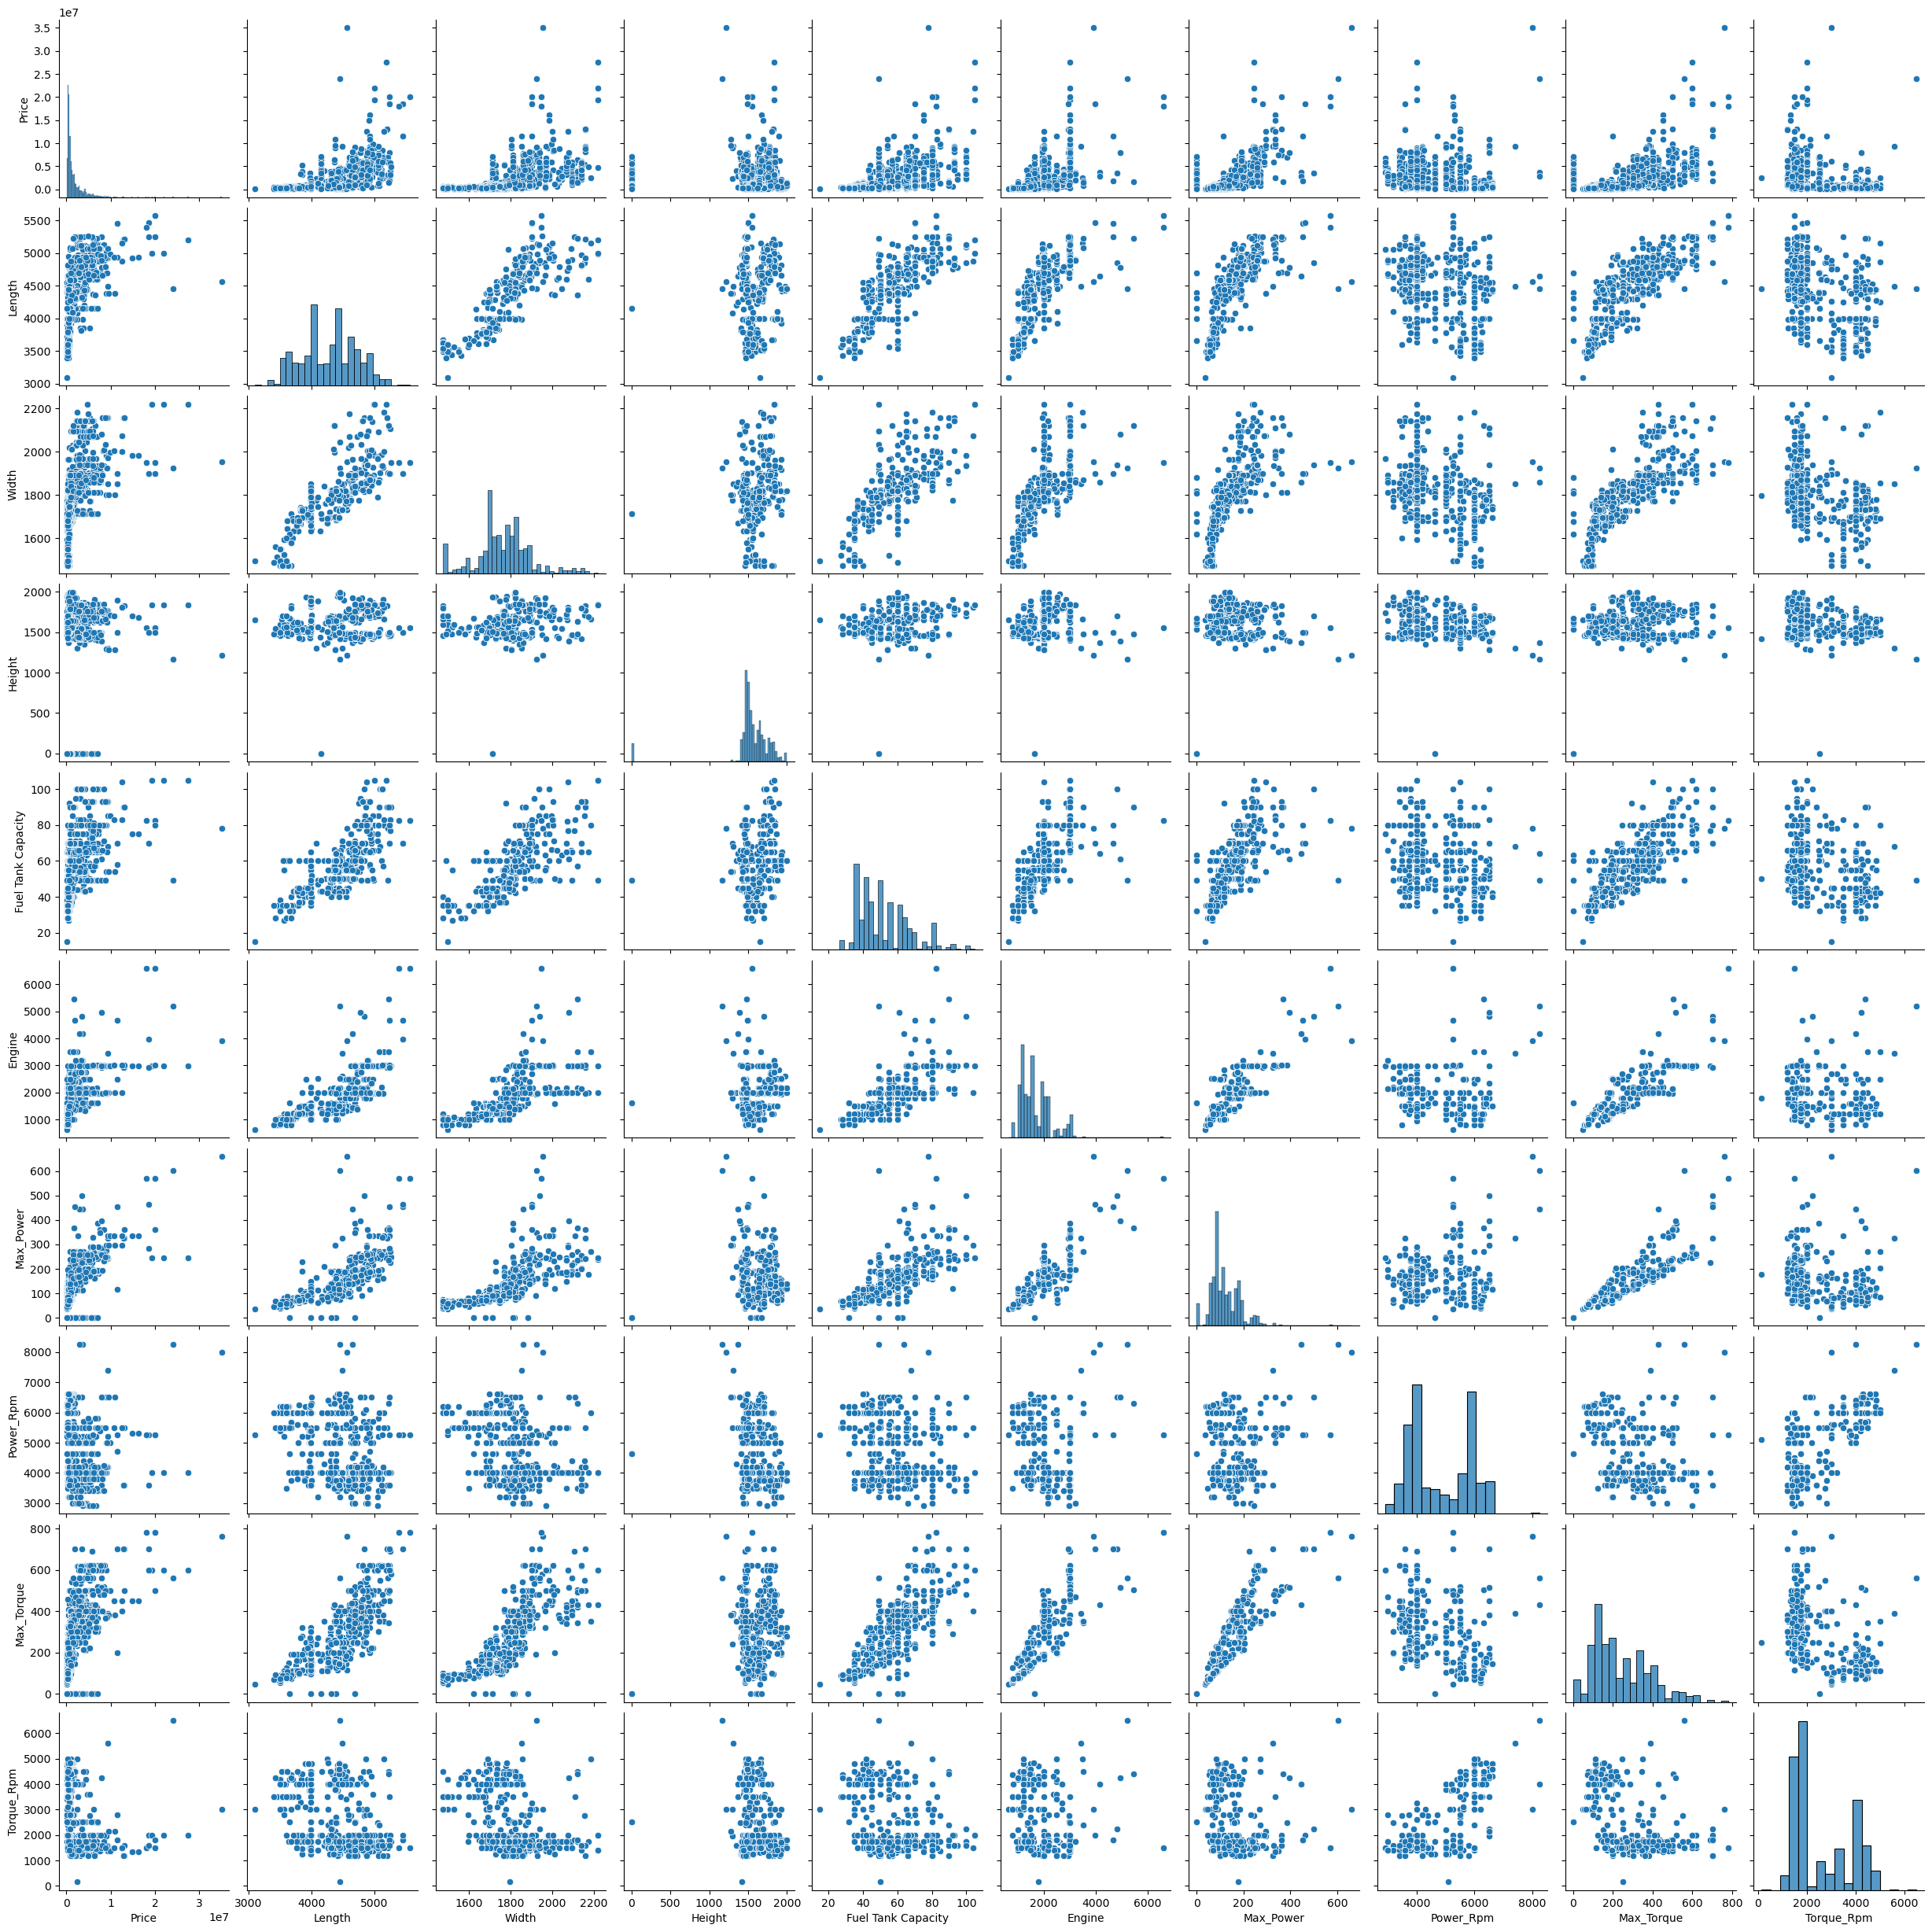

In [21]:
numeric_col = ['Price','Length', 'Width', 'Height', 
       'Fuel Tank Capacity', 'Engine', 'Max_Power', 'Power_Rpm', 'Max_Torque',
       'Torque_Rpm' ]
sns.pairplot(df[numeric_col])

In the plot above we can se various column are linearly related like Max_torque,Max_Power, Engine and Max_torque

<AxesSubplot:xlabel='Price', ylabel='Density'>

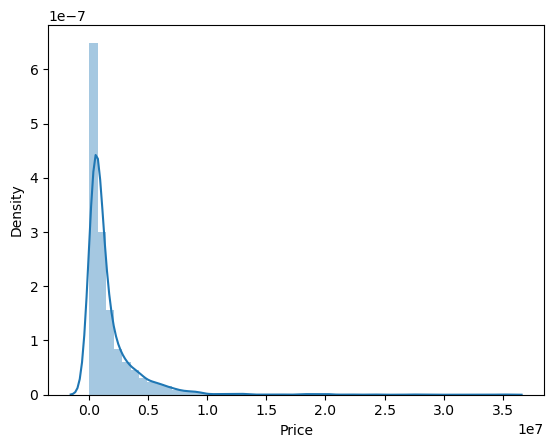

In [22]:
# Now let us create distribution plot of Price column
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Fuel Tank Capacity', ylabel='Density'>

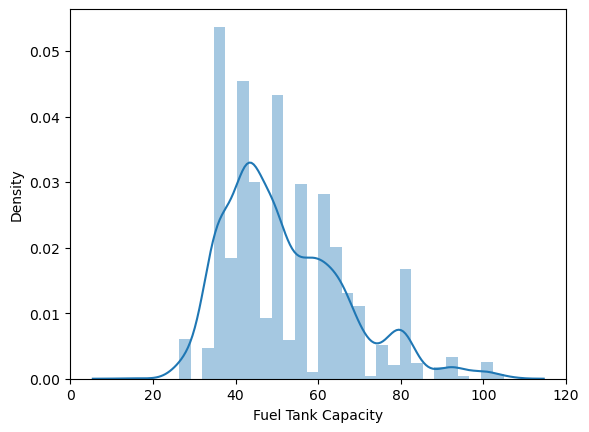

In [23]:
# Now let us create distribution plot of Fuel tank capacity column
sns.distplot(df['Fuel Tank Capacity'])

##### Now let us try to create headmap

<AxesSubplot:>

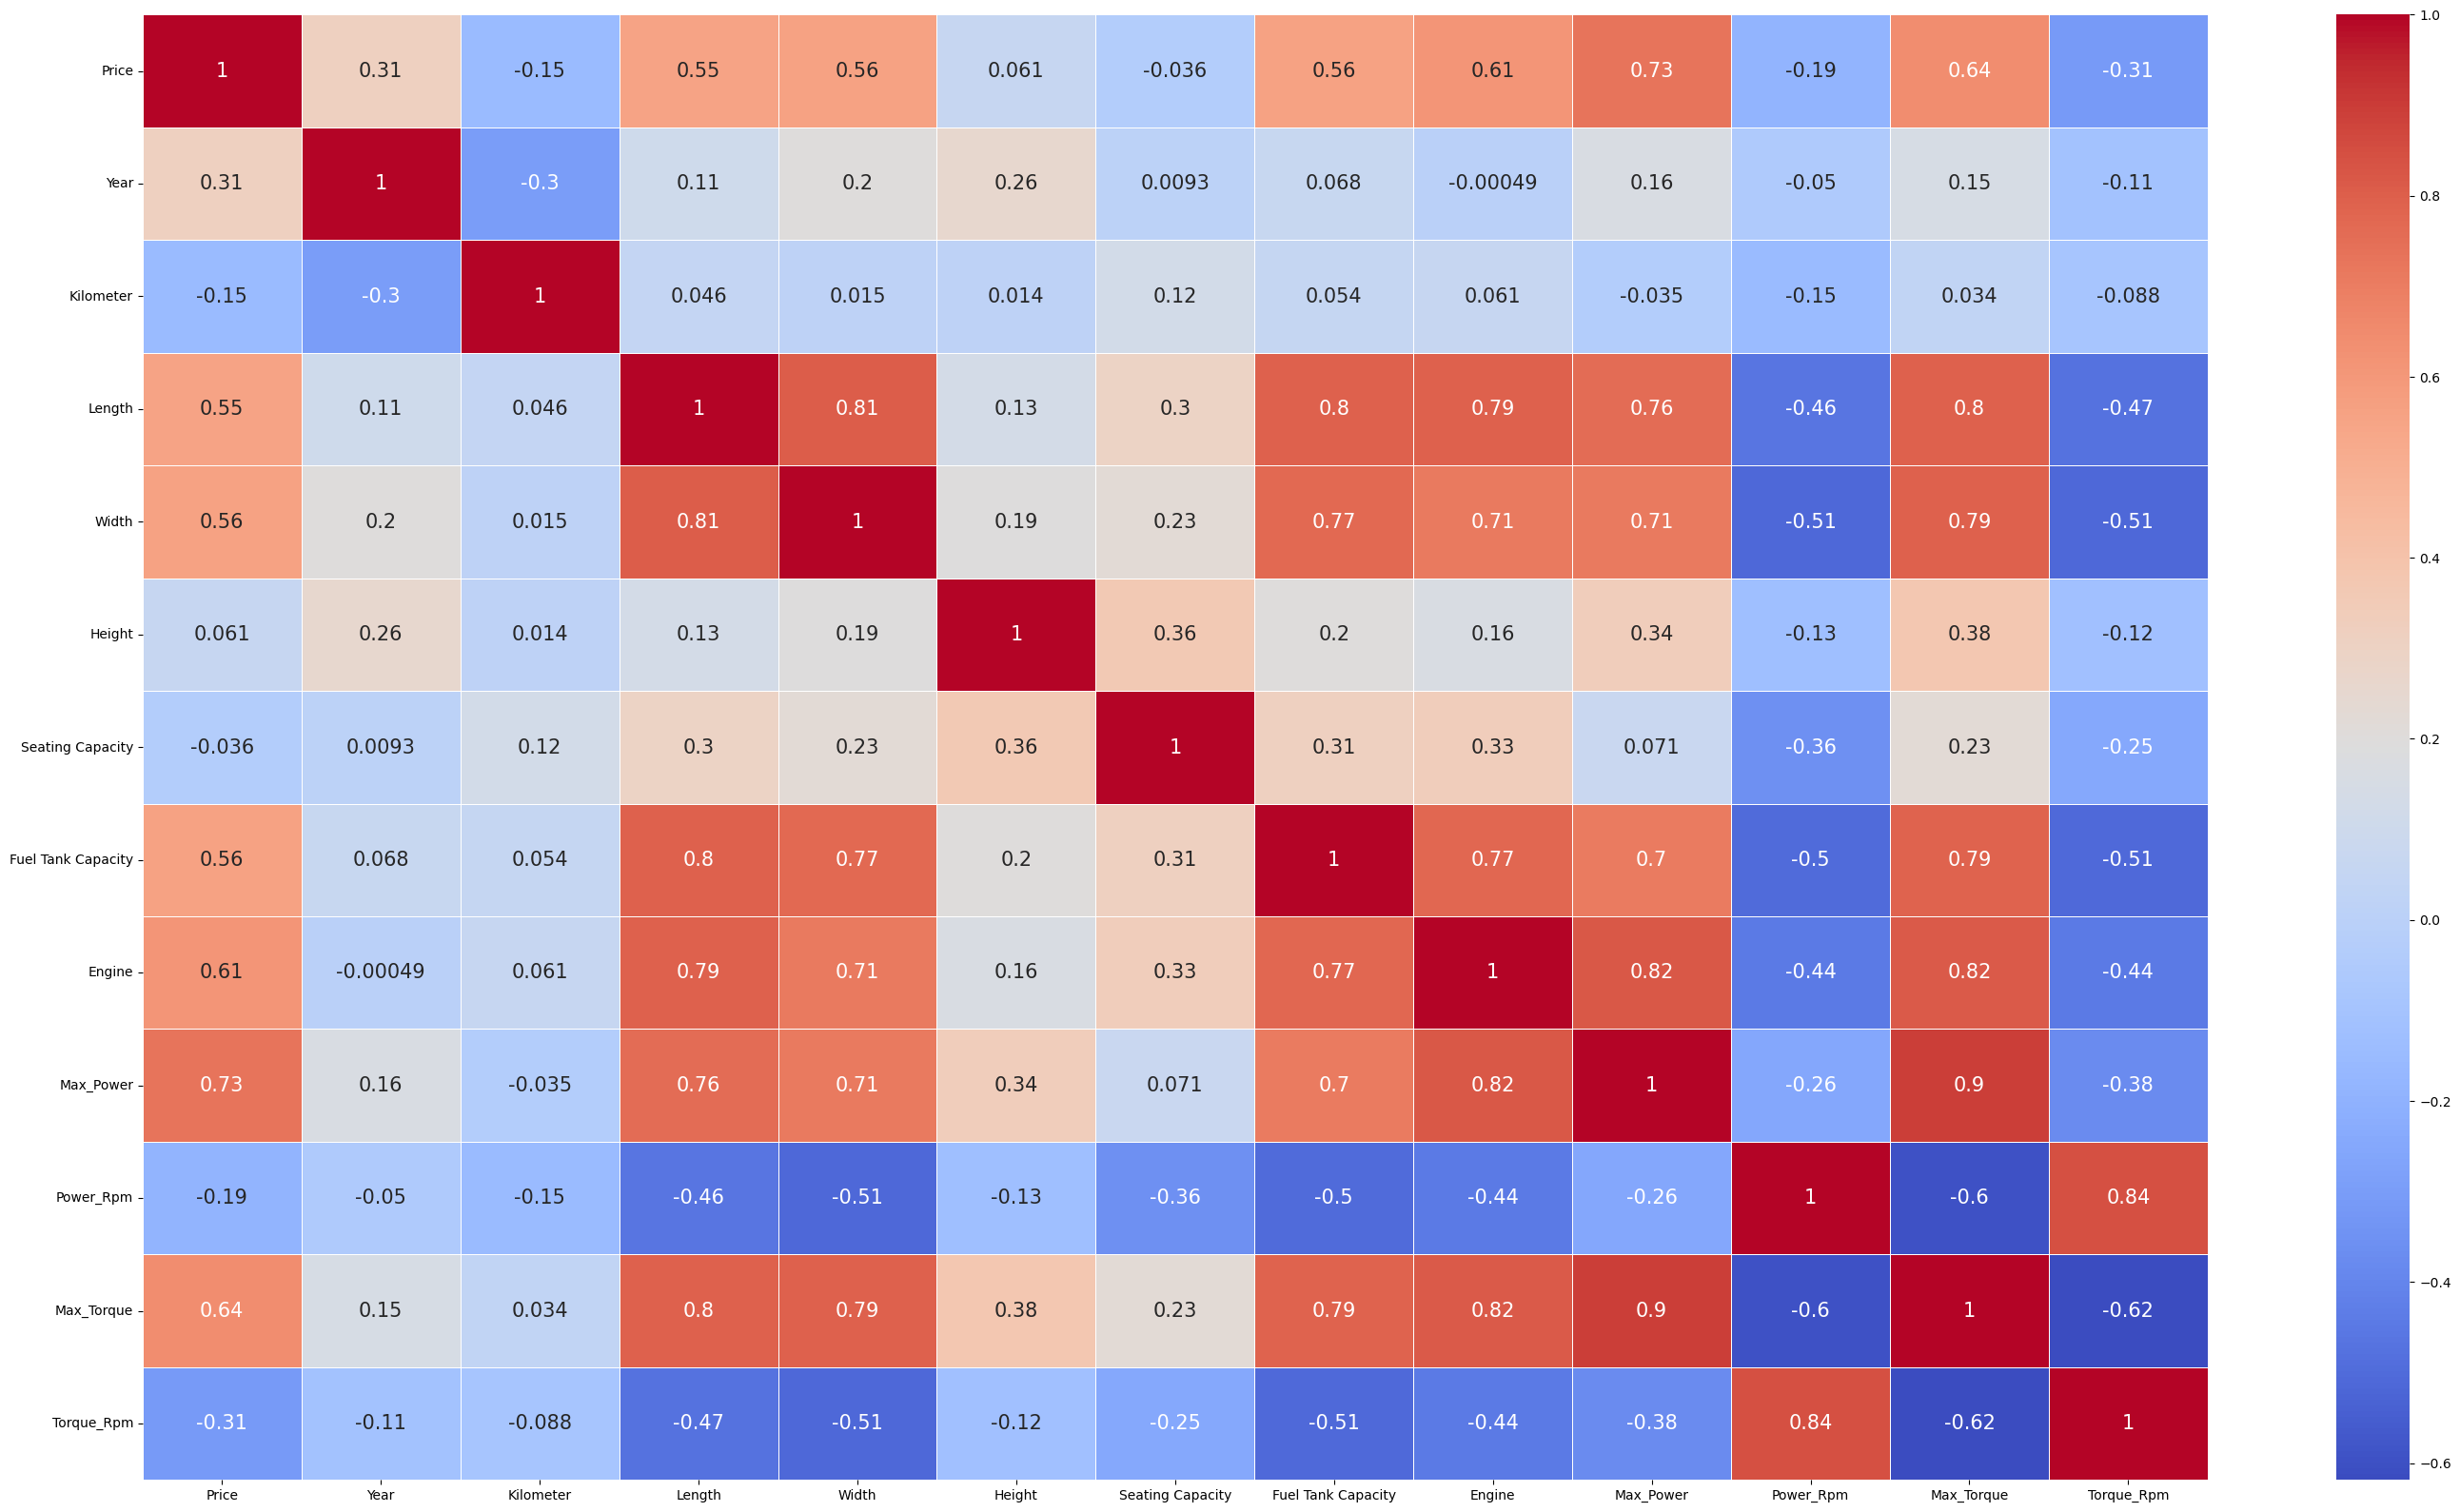

In [24]:
plt.figure(figsize=(35, 20))
sns.heatmap(data=df.corr(),annot=True, annot_kws={"size":15}, cmap='coolwarm', linewidths=.5)

<AxesSubplot:xlabel='Year', ylabel='Price'>

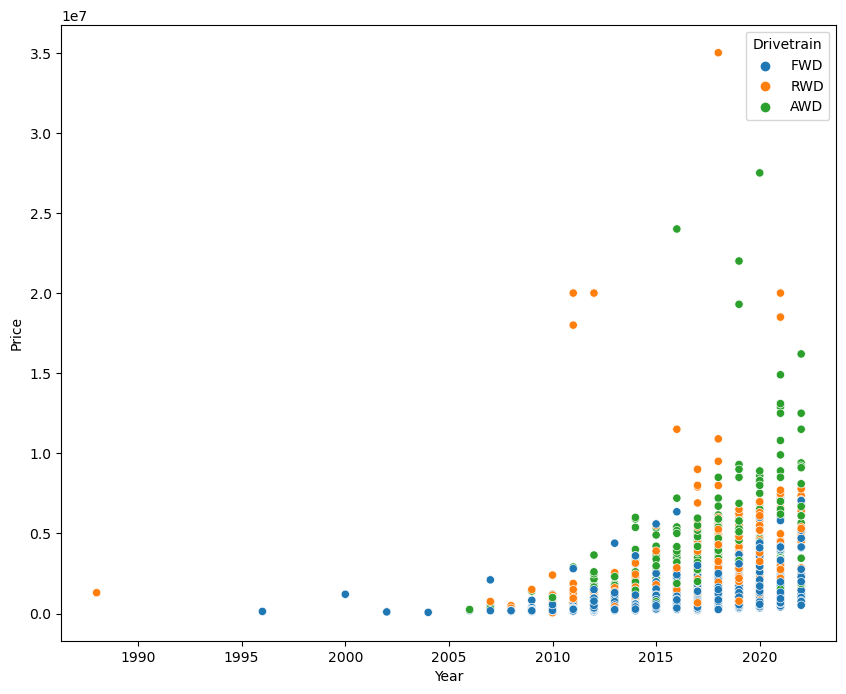

In [25]:
# Graph below shows relation between Year and Price based on Drivetrain
plt.figure(figsize=(10, 8))
sns.scatterplot(data = df, x = 'Year', y = 'Price', hue='Drivetrain')

<AxesSubplot:xlabel='Year', ylabel='Price'>

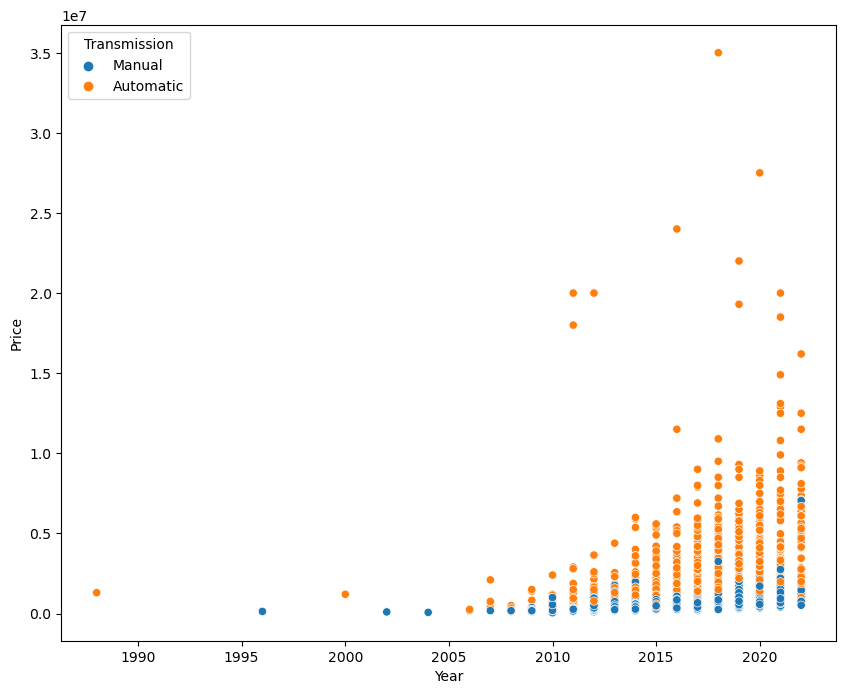

In [26]:
# Graph below shows relation between Year and Price based on Transmission
plt.figure(figsize=(10, 8))
sns.scatterplot(data = df, x = 'Year', y = 'Price', hue='Transmission' )

([<matplotlib.patches.Wedge at 0x11fc67bd4c0>,
 [Text(-0.8612838896248824, 0.6842441534077098, 'First'),
  Text(0.7869605653805043, -0.7685655915639193, 'Second'),
  Text(1.0891804052111218, -0.15390271246517023, 'Third'),
  Text(1.0991998473843967, -0.04194872477345568, 'Rest')],
 [Text(-0.4697912125226631, 0.3732240836769326, '78.6%'),
  Text(0.429251217480275, -0.4192175953985014, '18.1%'),
  Text(0.59409840284243, -0.08394693407191102, '2.0%'),
  Text(0.5995635531187617, -0.022881122603703095, '1.2%')])

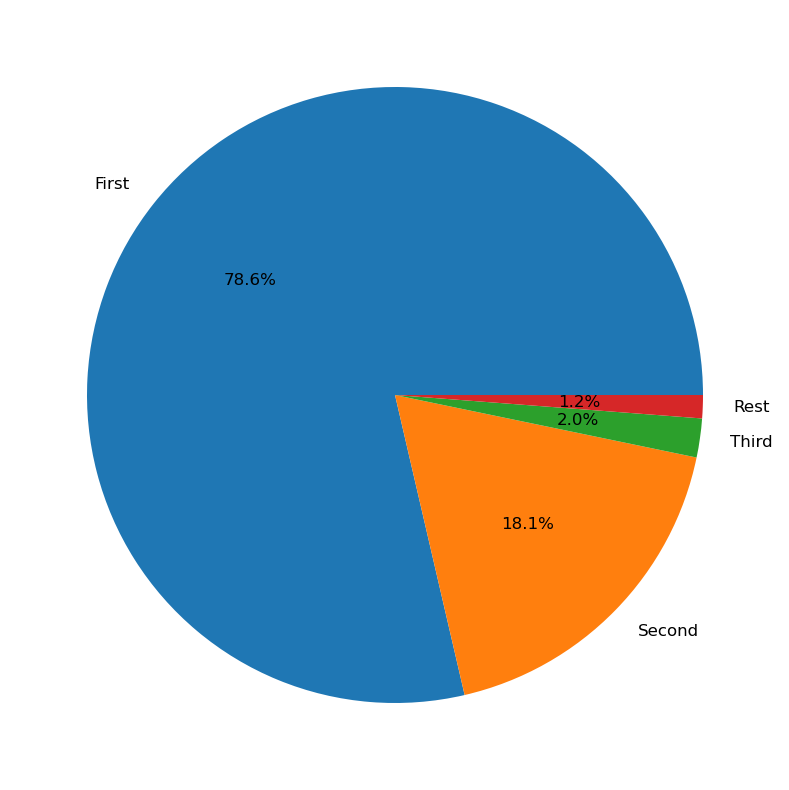

In [27]:
# Let us see the pie chart of Ownership of the vehicles
plt.figure(figsize=(15, 10))
plt.pie(df.Owner.value_counts(),labels = df.Owner.value_counts().index, autopct="%.1f%%",textprops={'fontsize': 12})

### Step 3 : Preprocessing the data

In [28]:
#Label Encoding
col = ['Model']
mapping = {}
for i in range(len(col)):
    le = LabelEncoder()
    df[col[i]] = le.fit_transform(df[col[i]])
    mapping[col[i]] = dict(zip(le.classes_, le.transform(le.classes_)))
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine,Max_Power,Power_Rpm,Max_Torque,Torque_Rpm
0,Honda,106,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35.0,1198.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,802,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42.0,1248.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,1030,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35.0,1197.0,79.0,6000.0,112.7619,4000.0
3,Toyota,492,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,3995.0,1745.0,1510.0,5.0,37.0,1197.0,82.0,6000.0,113.0000,4200.0
4,Toyota,548,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,4735.0,1830.0,1795.0,7.0,55.0,2393.0,148.0,3400.0,343.0000,1400.0


In [29]:
pprint.pprint(mapping)

{'Model': {'2 Series Gran Coupe 220d M Sport [2020-2021]': 0,
           '3-Series 320d': 1,
           '3-Series 320d Highline Sedan': 2,
           '3-Series 320d Luxury Edition': 3,
           '3-Series 320d Luxury Line': 4,
           '3-Series 320d Luxury Line [2014-2016]': 5,
           '3-Series 320d Prestige': 6,
           '3-Series 320d Sport Line': 7,
           '3-Series 320d Sport Line [2014-2016]': 8,
           '3-Series 320i Luxury Line': 9,
           '3-Series 330i M Sport Edition': 10,
           '488 GTB': 11,
           '5-Series 520d Luxury Line': 12,
           '5-Series 520d Luxury Line [2017-2019]': 13,
           '5-Series 520d M Sport': 14,
           '5-Series 520d Modern Line': 15,
           '5-Series 520d Sedan': 16,
           '5-Series 520d Sport Line': 17,
           '5-Series 525d Luxury Plus': 18,
           '5-Series 525d Sedan': 19,
           '5-Series 530d M Sport': 20,
           '5-Series 530d M Sport [2013-2017]': 21,
           '5-Series 530d

In [30]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type',
       'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Engine', 'Max_Power', 'Power_Rpm', 'Max_Torque',
       'Torque_Rpm'],
      dtype='object')

In [31]:
# Min Max Scaling
scaled_columns = ['Kilometer', 'Length', 'Width', 'Height', 'Fuel Tank Capacity', 'Engine', 'Max_Power', 'Power_Rpm', 'Max_Torque','Torque_Rpm']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df_scaled.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine,Max_Power,Power_Rpm,Max_Torque,Torque_Rpm
0,Honda,106,505000,2017,0.043575,Petrol,Manual,Pune,Grey,First,...,0.360729,0.275168,0.754386,5.0,0.222222,0.096180,0.131818,0.578652,0.139744,0.685039
1,Maruti Suzuki,802,450000,2014,0.037500,Diesel,Manual,Ludhiana,White,Second,...,0.362753,0.295302,0.779449,5.0,0.300000,0.104558,0.112121,0.204120,0.243590,0.291339
2,Hyundai,1030,220000,2011,0.033500,Petrol,Manual,Lucknow,Maroon,First,...,0.196761,0.161074,0.776942,5.0,0.222222,0.096012,0.119697,0.578652,0.144567,0.606299
3,Toyota,492,799000,2019,0.018750,Petrol,Manual,Mangalore,Red,First,...,0.362753,0.362416,0.756892,5.0,0.244444,0.096012,0.124242,0.578652,0.144872,0.637795
4,Toyota,548,1950000,2018,0.034500,Diesel,Manual,Mumbai,Grey,First,...,0.662348,0.476510,0.899749,7.0,0.444444,0.296414,0.224242,0.091760,0.439744,0.196850


In [32]:
# Creating Label
y = df['Price']
df.drop('Price',axis= 1,  inplace = True)

In [33]:
# Creating Feature data
X = df.copy()
X.head()

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine,Max_Power,Power_Rpm,Max_Torque,Torque_Rpm
0,Honda,106,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,...,3990.0,1680.0,1505.0,5.0,35.0,1198.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,802,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,...,3995.0,1695.0,1555.0,5.0,42.0,1248.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,1030,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,...,3585.0,1595.0,1550.0,5.0,35.0,1197.0,79.0,6000.0,112.7619,4000.0
3,Toyota,492,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,...,3995.0,1745.0,1510.0,5.0,37.0,1197.0,82.0,6000.0,113.0000,4200.0
4,Toyota,548,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,...,4735.0,1830.0,1795.0,7.0,55.0,2393.0,148.0,3400.0,343.0000,1400.0


In [34]:
# Performing One hot encoding for all the columns
X = pd.get_dummies(X, columns = ['Make', 'Fuel Type','Transmission', 'Location', 'Color', 'Owner', 'Seller Type','Drivetrain'] )
X.head()

,Model,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine,Max_Power,...,Owner_First,Owner_Rest,Owner_Second,Owner_Third,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,106,2017,87150,3990.0,1680.0,1505.0,5.0,35.0,1198.0,87.0,...,1,0,0,0,0,1,0,0,1,0
1,802,2014,75000,3995.0,1695.0,1555.0,5.0,42.0,1248.0,74.0,...,0,0,1,0,0,0,1,0,1,0
2,1030,2011,67000,3585.0,1595.0,1550.0,5.0,35.0,1197.0,79.0,...,1,0,0,0,0,0,1,0,1,0
3,492,2019,37500,3995.0,1745.0,1510.0,5.0,37.0,1197.0,82.0,...,1,0,0,0,0,0,1,0,1,0
4,548,2018,69000,4735.0,1830.0,1795.0,7.0,55.0,2393.0,148.0,...,1,0,0,0,0,0,1,0,0,1


### Step 5 : Shuffle and Split Dataset

In [35]:
# Preparing the data for Model training
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 100)

### Step 6 : Model Training

#### 1.  Linear Regressor

In [38]:
regression_clf = LinearRegression()
regression_clf.fit(X_train, y_train)
predicted = regression_clf.predict(X_test)

rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
#accuracy = accuracy_score(y_test, predicted)

print ("Testing Root mean square error: {}".format(rmse))
print ("Testing R2 score: {}".format(r2))

Testing Root mean square error: 3535126963776.6104
Testing R2 score: 0.546083288342834


In [39]:
predicted_train = regression_clf.predict(X_train)
rmse = mean_squared_error(y_train, predicted_train)
r2 = r2_score(y_train, predicted_train)

print ("Training root mean square error: {}".format(rmse))
print ("Training R2 score: {}".format(r2))

Training root mean square error: 1321403030665.8354
Training R2 score: 0.7538272221695607


#### 2. Lasso

In [40]:
rg = Ridge()

alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

rg_rs.fit(X_train, y_train)
rg_predicted = rg_rs.predict(X_test)
rmse = mean_squared_error(y_test, rg_predicted)
r2 = r2_score(y_test, rg_predicted)
print ("Testing Root mean square error: {}".format(rmse))
print ("Testing R2 score: {}".format(r2))

Testing Root mean square error: 3196389270809.328
Testing R2 score: 0.5895778222822265


In [41]:
rg_predicted_train = rg_rs.predict(X_train)
rmse = mean_squared_error(y_train, rg_predicted_train)
r2 = r2_score(y_train, rg_predicted_train)
print ("Training root mean square error: {}".format(rmse))
print ("Training R2 score: {}".format(r2))

Training root mean square error: 1378907940643.7249
Training R2 score: 0.7431142579189691


#### 3. Random Forrest Regressor

In [42]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

rf_rs.fit(X_train, y_train)
rf_predicted = rf_rs.predict(X_test)
rmse = mean_squared_error(y_test, rf_predicted)
r2 = r2_score(y_test, rf_predicted)
print ("Testing Root mean square error: {}".format(rmse))
print ("Testing R2 score: {}".format(r2))

Testing Root mean square error: 2483934709977.6343
Testing R2 score: 0.6810582796382438


In [43]:
rf_predicted = rf_rs.predict(X_train)
rmse = mean_squared_error(y_train, rf_predicted)
r2 = r2_score(y_train, rf_predicted)
print ("Training root mean square error: {}".format(rmse))
print ("Training R2 score: {}".format(r2))

Training root mean square error: 267923548769.22388
Training R2 score: 0.9500867769211374


#### 4. Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
gb_rs.fit(X_train, y_train)
gb_predicted = gb_rs.predict(X_test)
rmse = mean_squared_error(y_test, gb_predicted)
r2 = r2_score(y_test, gb_predicted)
print ("Testing Root mean square error: {}".format(rmse))
print ("Testing R2 score: {}".format(r2))

In [ ]:
gb_predicted = gb_rs.predict(X_train)
rmse = mean_squared_error(y_train, gb_predicted)
r2 = r2_score(y_train, gb_predicted)
print ("Training root mean square error: {}".format(rmse))
print ("Training R2 score: {}".format(r2))